<h1><center>Final Exam</center></h1>
<h2><center>Pricing Analytics</center></h2>
<h3><center>Juan Manuel Aviña Muñoz</center></h3>

# Import libraries

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from fancyimpute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)

# Load Data Set

In [278]:
excel_data = pd.read_excel('../Ex_F/DB/DMN Report 29.xlsx', sheet_name=None)

# Dataset Cleaning

In [279]:
def str_to_float(col):
    try:
        return float(col)
    except ValueError:
        return col
    
    
def clean_data(dfs, tab, attrib):
    df = dfs[tab]

    # Remove first rows
    df_tab = df.iloc[4:]
    # Assign column names
    df_tab.columns = attrib

    # Delete "AVG." rows
    delete = 'AVG.'
    df_tab = df_tab[df_tab['Week'].astype(str).str.contains(delete) == False]

    # Delete "NaN" rows
    df_tab = df_tab.dropna(subset=['Week'])
    df_tab = df_tab.reset_index(drop=True)

    # Convert 'Week' column to date format
    df_tab['Start_interval'] = pd.to_datetime(df_tab['Week'].str.extract(r'(\d{1,2}/\d{1,2}/\d{2})')[0], format='%m/%d/%y')

    # Obtain week number of the year
    df_tab['Year'] = df_tab['Start_interval'].dt.year
    df_tab['Month'] = df_tab['Start_interval'].dt.month
    df_tab['Week year'] = df_tab['Start_interval'].dt.isocalendar().week

    # Convert attributes to float, except Week
    attrib.remove('Week')
    df_tab[attrib] = df_tab[attrib].apply(lambda col: pd.to_numeric(col.apply(str_to_float), errors='coerce'))
    return df_tab

In [280]:
tabs = ['1996', '1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
        '2010 - 2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

# Create a dictionary to store df's
dfs = {}
for tab_name, tab_data in excel_data.items():
    dfs[tab_name] = tab_data

Cleaning for each sheet of the dataset

In [281]:
attri_2023 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2023 = clean_data(dfs, '2023', attri_2023)
#df_2023

In [282]:
attri_2022 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2022 = clean_data(dfs, '2022', attri_2022)
#df_2022

In [283]:
attri_2021 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2021 = clean_data(dfs, '2021', attri_2021)
#df_2021

In [284]:
attri_2020 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2020 = clean_data(dfs, '2020', attri_2020)
#df_2020

In [285]:
attri_2019 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2019 = clean_data(dfs, '2019', attri_2019)
#df_2019

In [286]:
attri_2018 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2018 = clean_data(dfs, '2018', attri_2018)
#df_2018

In [287]:
attri_2017 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2017 = clean_data(dfs, '2017', attri_2017)
#df_2017

In [288]:
attri_2016 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2016 = clean_data(dfs, '2016', attri_2016)
#df_2016

In [289]:
attri_2015 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2015 = clean_data(dfs, '2015', attri_2015)
#df_2015

In [290]:
attri_2014 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2014 = clean_data(dfs, '2014', attri_2014)
#df_2014

In [291]:
attri_2013 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2013 = clean_data(dfs, '2013', attri_2013)
#df_2013

In [292]:
attri_2012 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2012 = clean_data(dfs, '2012', attri_2012)
#df_2012

In [293]:
attri_2011 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2011 = clean_data(dfs, '2011', attri_2011)
#df_2011

In [294]:
attri_2010 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2010 = clean_data(dfs, '2010', attri_2010)
#df_2010

In [295]:
attri_2009 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2009 = clean_data(dfs, '2009', attri_2009)
#df_2009

In [296]:
attri_2008 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2008 = clean_data(dfs, '2008', attri_2008)
#df_2008

In [297]:
attri_2007 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2007 = clean_data(dfs, '2007', attri_2007)
#df_2007

In [298]:
attri_2006 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2006 = clean_data(dfs, '2006', attri_2006)
#df_2006

In [299]:
attri_2005 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2005 = clean_data(dfs, '2005', attri_2005)
#df_2005

In [300]:
attri_2004 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2004 = clean_data(dfs, '2004', attri_2004)
#df_2004

In [301]:
attri_2003 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2003 = clean_data(dfs, '2003', attri_2003)
#df_2003

In [302]:
attri_2002 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2002 = clean_data(dfs, '2002', attri_2002)
#df_2002

In [303]:
attri_2001 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2001 = clean_data(dfs, '2001', attri_2001)
#df_2001

In [304]:
attri_2000 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central', 'Nonfat east', 'AA butter', 'Cheese 40 blocks',
              'Cheese barrel']

df_2000 = clean_data(dfs, '2000', attri_2000)
df_2000['Nonfat central east'] = df_2000[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_2000.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

#df_2000

In [305]:
attri_1999 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks',
              'Cheese barrel']

df_1999 = clean_data(dfs, '1999', attri_1999)
df_1999['Nonfat central east'] = df_1999[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1999.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

#df_1999

In [306]:
attri_1998 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks',
              'Cheese barrel']

df_1998 = clean_data(dfs, '1998', attri_1998)
df_1998['Nonfat central east'] = df_1998[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1998.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

#df_1998

In [307]:
attri_1997 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks',
              'Cheese barrel']

df_1997 = clean_data(dfs, '1997', attri_1997)
df_1997['Nonfat central east'] = df_1997[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1997.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

#df_1997

In [308]:
attri_1996 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks',
              'Cheese barrel']

df_1996 = clean_data(dfs, '1996', attri_1996)
df_1996['Nonfat central east'] = df_1996[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1996.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

#df_1996

In [309]:
# Create a list of DataFrames from 2023 to 1996
dfs = [globals()[f"df_{year}"] for year in range(2023, 1995, -1)]

# Concatenate DataFrames
df_all = pd.concat(dfs, ignore_index=True)
df_all

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Start_interval,Year,Month,Week year,Cheese barrel,Delac
0,1/2/23 - 1/6/23,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,2023-01-02,2023,1,1,NaN,NaN
1,1/9/23 - 1/13/23,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,2023-01-09,2023,1,2,NaN,NaN
2,1/16/23 - 1/20/23,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,2023-01-16,2023,1,3,NaN,NaN
3,1/23/23 - 1/27/23,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,2023-01-23,2023,1,4,NaN,NaN
4,1/30/23 - 2/3/23,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,2023-01-30,2023,1,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,11/25/96 - 12/01,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1996-11-25,1996,11,48,1.1575,0.375
1436,12/02/96 - 12/08,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1996-12-02,1996,12,49,1.1525,0.365
1437,12/09/96 - 12/15,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1996-12-09,1996,12,50,1.1500,0.355
1438,12/16/96 - 12/22,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1996-12-16,1996,12,51,1.1475,0.350


In [310]:
# Rearrange columns of the complete DataFrames
df_all_attribs = ['Start_interval', 'Lactose', 'Whey central', 'Whey west', 'Whey east',
                  'NDPSR whey avg', 'CME whey avg', 'NDPSR NFDM', '34p WPC','Nonfat west', 'Nonfat central east',
                  'Sweet cream buttermilk central', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel', 'Delac']

df_all_years = df_all[df_all_attribs]
df_all_years

,Start_interval,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023-01-02,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023-01-09,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023-01-16,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023-01-23,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023-01-30,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996-11-25,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996-12-02,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996-12-09,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996-12-16,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [311]:
# Save dataset based on the "start inteval"
df_all_years.to_csv('../Ex_F/DB/DMN Report 29 - Preprocess by start interval.csv', index=False)
df_all_years

,Start_interval,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023-01-02,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023-01-09,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023-01-16,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023-01-23,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023-01-30,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996-11-25,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996-12-02,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996-12-09,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996-12-16,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [312]:
df_prices = ['Lactose', 'Whey central', 'Whey west', 'Whey east',
             'NDPSR whey avg', 'CME whey avg', 'NDPSR NFDM', '34p WPC','Nonfat west', 'Nonfat central east',
             'Sweet cream buttermilk central', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel', 'Delac']

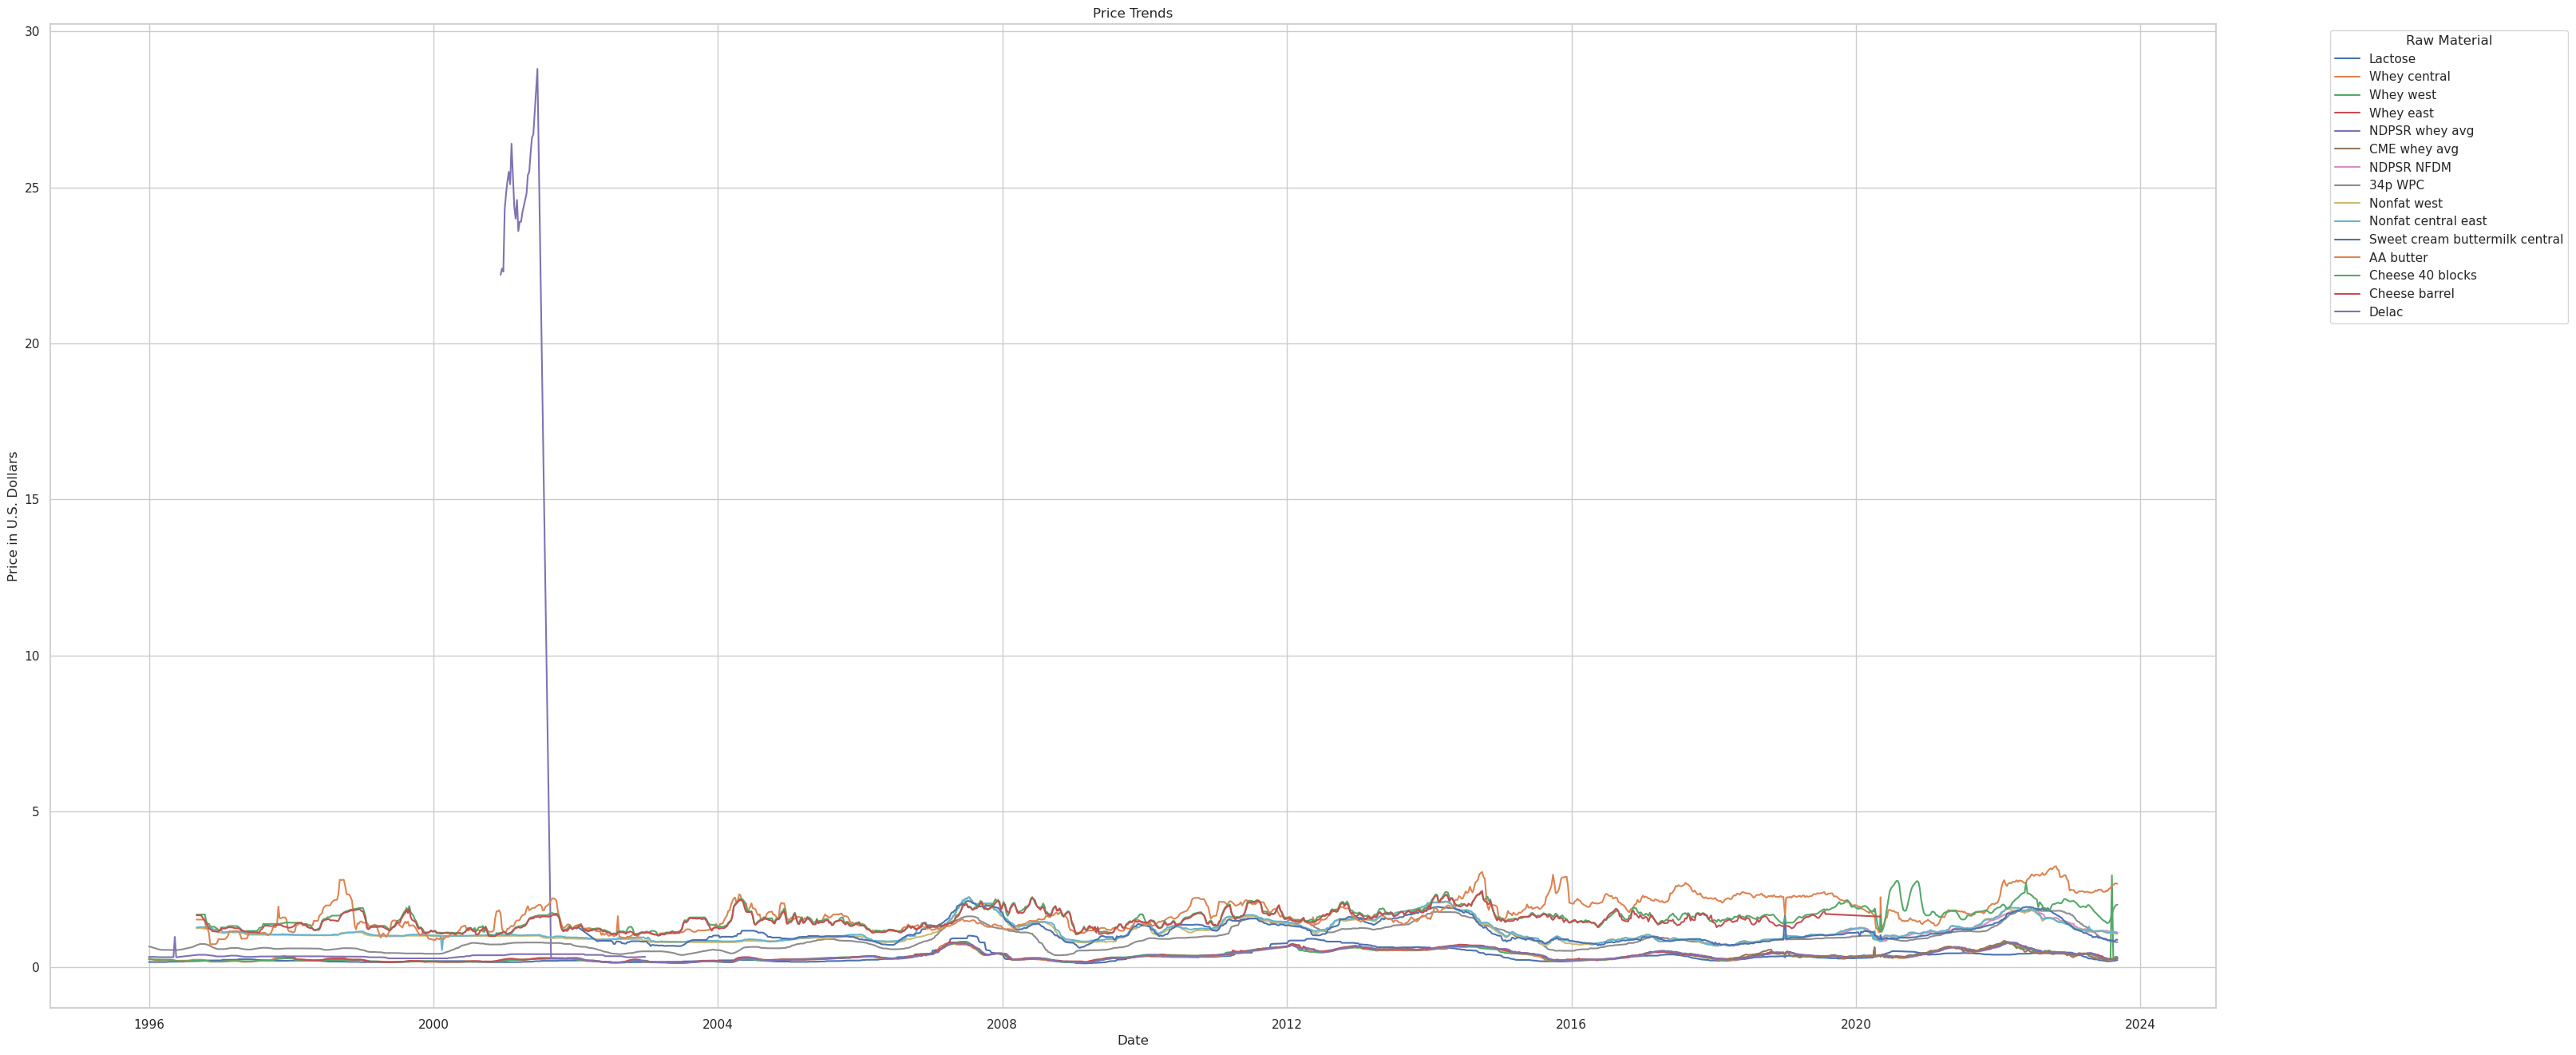

In [313]:
# Plotting trends
sns.set(style="whitegrid")

# Plotting the price trend for each column
plt.figure(figsize=(35, 16))
sns.lineplot(x='Start_interval', y='Lactose', data=df_all_years, label='Lactose')
sns.lineplot(x='Start_interval', y='Whey central', data=df_all_years, label='Whey central')
sns.lineplot(x='Start_interval', y='Whey west', data=df_all_years, label='Whey west')
sns.lineplot(x='Start_interval', y='Whey east', data=df_all_years, label='Whey east')
sns.lineplot(x='Start_interval', y='NDPSR whey avg', data=df_all_years, label='NDPSR whey avg')
sns.lineplot(x='Start_interval', y='CME whey avg', data=df_all_years, label='CME whey avg')
sns.lineplot(x='Start_interval', y='NDPSR NFDM', data=df_all_years, label='NDPSR NFDM')
sns.lineplot(x='Start_interval', y='34p WPC', data=df_all_years, label='34p WPC')
sns.lineplot(x='Start_interval', y='Nonfat west', data=df_all_years, label='Nonfat west')
sns.lineplot(x='Start_interval', y='Nonfat central east', data=df_all_years, label='Nonfat central east')
sns.lineplot(x='Start_interval', y='Sweet cream buttermilk central', data=df_all_years, label='Sweet cream buttermilk central')
sns.lineplot(x='Start_interval', y='AA butter', data=df_all_years, label='AA butter')
sns.lineplot(x='Start_interval', y='Cheese 40 blocks', data=df_all_years, label='Cheese 40 blocks')
sns.lineplot(x='Start_interval', y='Cheese barrel', data=df_all_years, label='Cheese barrel')
sns.lineplot(x='Start_interval', y='Delac', data=df_all_years, label='Delac')

# Axis legends
plt.title('Price Trends')
plt.xlabel('Date')
plt.ylabel('Price in U.S. Dollars')
plt.legend(title='Raw Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

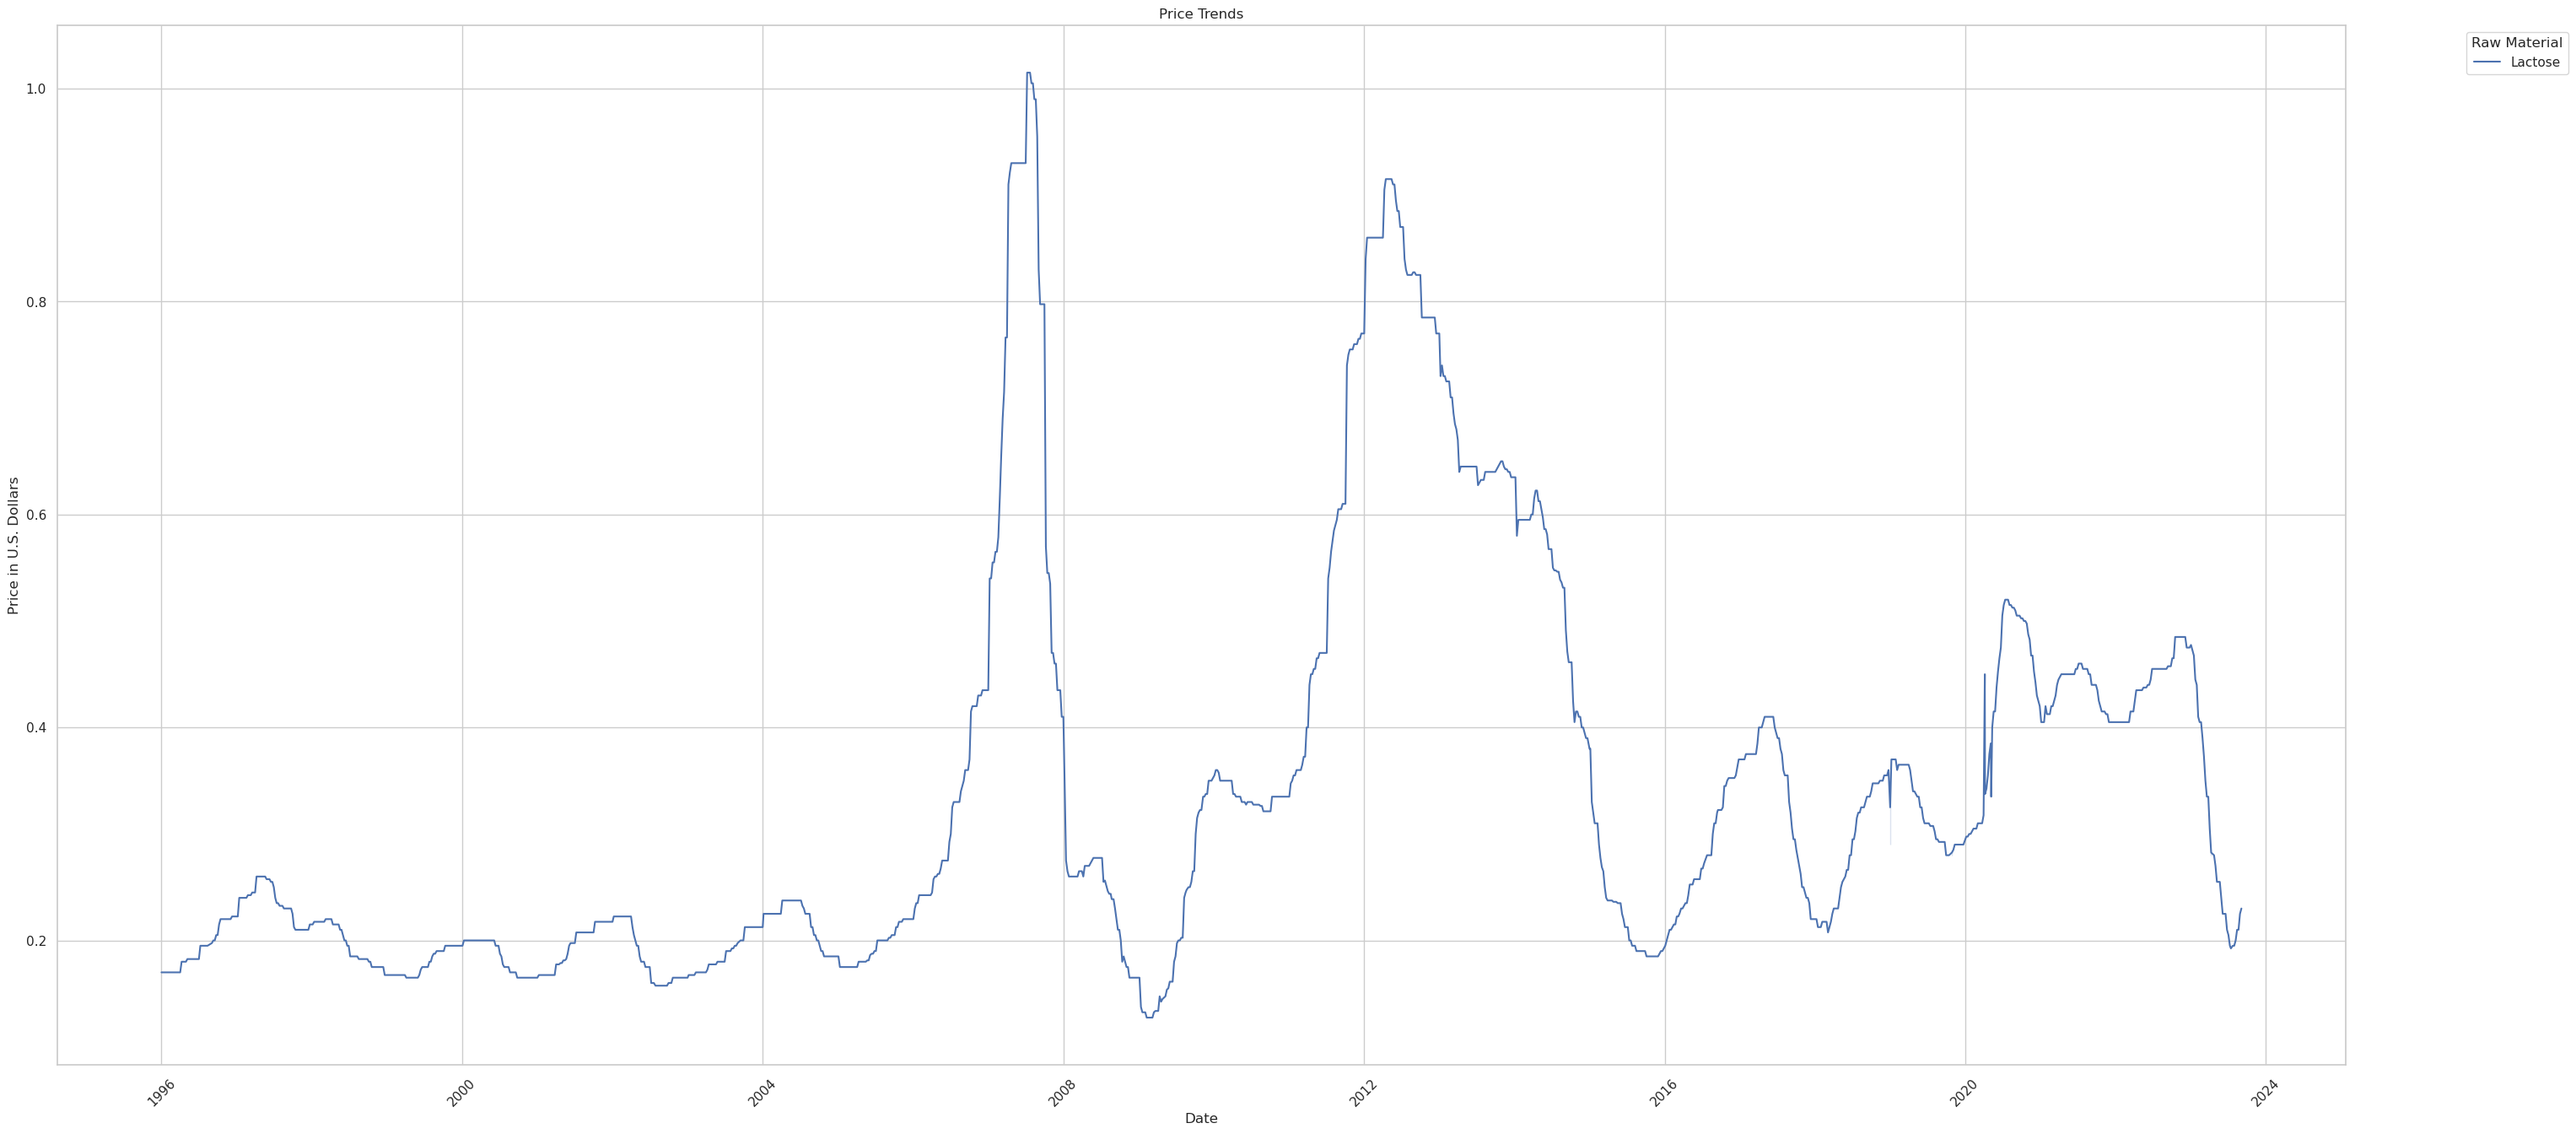

In [314]:
# Plotting trends
sns.set(style="whitegrid")

# Plotting the price trend for each column
plt.figure(figsize=(35, 16))
sns.lineplot(x='Start_interval', y='Lactose', data=df_all_years, label='Lactose')

# Axis legends
plt.title('Price Trends')
plt.xlabel('Date')
plt.ylabel('Price in U.S. Dollars')
plt.legend(title='Raw Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [315]:
cols_by_week = ['Year', 'Month', 'Week year', 'Lactose', 'Whey central', 'Whey west', 'Whey east',
                  'NDPSR whey avg', 'CME whey avg', 'NDPSR NFDM', '34p WPC','Nonfat west', 'Nonfat central east',
                  'Sweet cream buttermilk central', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel', 'Delac']

df_all_by_week = df_all[cols_by_week]
df_all_by_week['Year'] = df_all_by_week['Year'].astype('int')
df_all_by_week['Week year'] = df_all_by_week['Week year'].astype('int')

# Save dataset based on start inteval
df_all_by_week.to_csv('../Ex_F/DB/DMN Report 29 - Preprocess by week.csv', index=False)
df_all_by_week

/tmp/ipykernel_17320/2653886851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_by_week['Year'] = df_all_by_week['Year'].astype('int')
/tmp/ipykernel_17320/2653886851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_by_week['Week year'] = df_all_by_week['Week year'].astype('int')


,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023,1,1,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023,1,2,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023,1,3,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023,1,4,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023,1,5,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996,11,48,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996,12,49,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996,12,50,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996,12,51,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [316]:
df_all_by_week.describe()

,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
count,1440.000000,1440.000000,1440.000000,1437.000000,1437.000000,1437.000000,1341.000000,1155.000000,284.000000,242.000000,1437.000000,1404.000000,1404.000000,1109.000000,1401.000000,1401.000000,1188.000000,363.000000
mean,2009.337500,6.371528,26.315972,0.336766,0.352228,0.360878,0.380433,0.906638,0.443147,1.254077,0.900317,1.134225,1.162195,1.150331,1.710473,1.602492,1.499122,0.357811
std,8.007292,3.434509,15.000422,0.189034,0.155367,0.174252,0.163269,3.497731,0.133350,0.268975,0.368705,0.325392,0.326585,0.348552,0.507677,0.323600,0.286058,0.052445
min,1996.000000,1.000000,1.000000,0.127500,0.135000,0.135000,0.152500,0.136300,0.234000,0.838700,0.387500,0.685000,0.552812,0.625000,0.740000,1.008000,0.997500,0.287500
25%,2002.000000,3.000000,13.000000,0.200000,0.230000,0.227500,0.253750,0.269450,0.341875,1.051250,0.605000,0.902500,0.919687,0.885000,1.305000,1.352000,1.280000,0.328750
50%,2009.000000,6.000000,26.000000,0.260000,0.310000,0.322500,0.346250,0.371600,0.418900,1.171200,0.812500,1.025000,1.044687,1.025000,1.607500,1.598500,1.476750,0.350000
75%,2016.000000,9.000000,39.000000,0.415000,0.450000,0.465000,0.493750,0.541100,0.520125,1.426300,1.127500,1.271250,1.316250,1.360000,2.087500,1.800000,1.675875,0.387500
max,2023.000000,12.000000,53.000000,1.015000,0.805000,2.950000,0.811250,28.800000,0.855000,1.842300,1.832500,2.240000,2.248750,2.252300,3.242200,2.772300,2.452000,0.977500


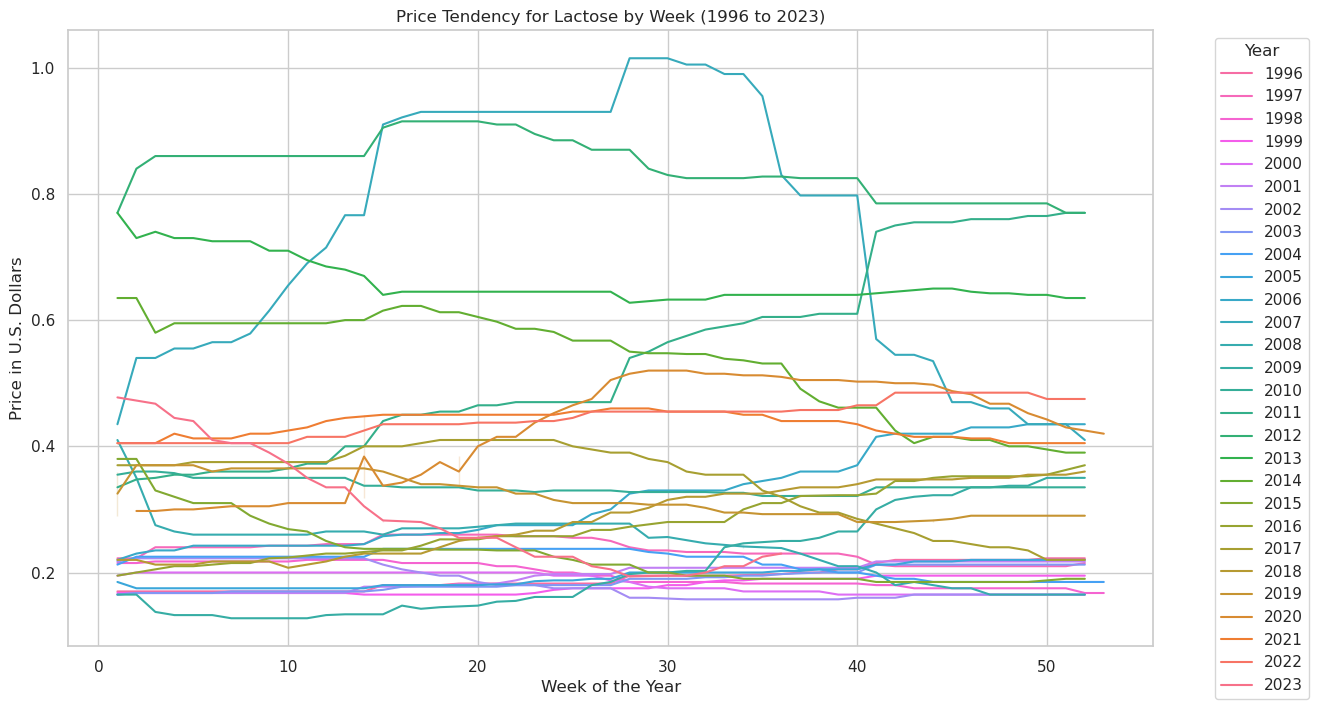

In [317]:
sns.set(style="whitegrid")

raw_material_column = 'Lactose'

# Filter DataFrame for desired raw material and years
df_filtered = df_all_by_week[df_all_by_week['Year'].between(1996, 2023)]

# Creating a unique color palette for each year
colores_por_año = sns.color_palette("husl", n_colors=len(df_filtered['Year'].unique()))

# Plot the price trend for the selected raw material
plt.figure(figsize=(14, 8))
sns.lineplot(x='Week year', y=raw_material_column, hue='Year', data=df_filtered,
             palette=dict(zip(df_filtered['Year'].unique(), colores_por_año)), markers=True)

plt.title(f'Price Tendency for {raw_material_column} by Week (1996 to 2023)')
plt.xlabel('Week of the Year')
plt.ylabel('Price in U.S. Dollars')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Missing Values

In [318]:
nan_count_1 = df_all_by_week.isna().sum()
nan_count_1 = pd.DataFrame(nan_count_1.items(), columns=['Attribute', 'NaN']).T
nan_count_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Attribute,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
NaN,0,0,0,3,3,3,99,285,1156,1198,3,36,36,331,39,39,252,1077


In [319]:
df_imput = df_all_by_week.copy()
df_imput

,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023,1,1,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023,1,2,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023,1,3,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023,1,4,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023,1,5,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996,11,48,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996,12,49,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996,12,50,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996,12,51,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [320]:
# Imputation of average by type ('Engine Type') using a lambda function
for column in df_imput.columns[3:]:
    df_imput[column] = df_imput.groupby(['Year', 'Month'])[column].transform(lambda x: x.fillna(x.mean()))

df_imput

,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023,1,1,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023,1,2,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023,1,3,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023,1,4,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023,1,5,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996,11,48,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996,12,49,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996,12,50,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996,12,51,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [321]:
nan_count_2 = df_imput.isna().sum()
nan_count_2 = pd.DataFrame(nan_count_2.items(), columns=['Attribute', 'NaN']).T
nan_count_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Attribute,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
NaN,0,0,0,0,0,0,96,262,1152,1195,0,35,35,321,35,35,240,1075


# Data Impute and Cleaning

For this part, Multiple Imputation by Chained Equations (MICE) imputation will be used since it's better suited when the missingness in our numerical data is complicated or not purely random.

MICE works by creating multiple imputations for missing values based on the relationships found in the rest of the data. It's especially effective when we have a dataset with multiple features influencing each other

In [322]:
# List of columns to impute
cols_by_week = ['Lactose', 'Whey central', 'Whey west', 'Whey east',
                'NDPSR whey avg', 'CME whey avg', 'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east',
                'Sweet cream buttermilk central', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel', 'Delac']


# Selecting the relevant columns
df_to_impute = df_imput[cols_by_week]

# Initialize MICE Imputer
mice_imputer = IterativeImputer()

# Apply MICE Imputation
df_imputed = mice_imputer.fit_transform(df_to_impute)

# Create a DataFrame from the imputed data
df_imputed = pd.DataFrame(df_imputed, columns=cols_by_week)

# Merge the imputed data back with the non-imputed columns
df_imput[cols_by_week] = df_imputed

# Check the imputed data
print(df_imput.head())

   Year  Month  Week year  Lactose  Whey central  Whey west  Whey east  \
0  2023      1          1   0.4775        0.4100      0.435    0.42750   
1  2023      1          2   0.4725        0.4025      0.435    0.42625   
2  2023      1          3   0.4675        0.3725      0.415    0.42500   
3  2023      1          4   0.4450        0.3600      0.405    0.41125   
4  2023      1          5   0.4400        0.3600      0.385    0.39500   

   NDPSR whey avg  CME whey avg  NDPSR NFDM  34p WPC  Nonfat west  \
0          0.4371        0.4088      1.4326   1.7275        1.400   
1          0.4430        0.3575      1.4074   1.6775        1.360   
2          0.4453        0.3300      1.3974   1.6775        1.330   
3          0.4259        0.3245      1.3981   1.6250        1.280   
4          0.4001        0.3620      1.2786   1.5750        1.215   

   Nonfat central east  Sweet cream buttermilk central  AA butter  \
0               1.3800                           1.350     2.4625   
1 

In [323]:
nan_count_3 = df_imput.isna().sum()
nan_count_3 = pd.DataFrame(nan_count_3.items(), columns=['Attribute', 'NaN']).T
nan_count_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Attribute,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Dealing with Outliers

In [324]:
def detect_outliers(df, method='z', threshold=3, display_boxplots=True, boxplots_per_row=4):
    """
    Detect outliers in a DataFrame and display the count of outliers per attribute.
    
    Returns:
    - outliers_table: pandas DataFrame, table displaying the count of outliers per attribute
    """
    outliers_count = pd.DataFrame(columns=['Attribute', 'Outliers Count'])
    num_attributes = df.select_dtypes(include=np.number).columns

    for idx, attribute in enumerate(num_attributes, 1):
        if method == 'z':
            z_scores = np.abs((df[attribute] - df[attribute].mean()) / df[attribute].std())
            outliers_mask = z_scores > threshold
        elif method == 'iqr':
            Q1 = df[attribute].quantile(0.25)
            Q3 = df[attribute].quantile(0.75)
            IQR = Q3 - Q1
            outliers_mask = (df[attribute] < Q1 - 1.5 * IQR) | (df[attribute] > Q3 + 1.5 * IQR)
        else:
            raise ValueError("Invalid method. Use 'z' for Z-score or 'iqr' for interquartile range.")

        outliers_count = pd.concat([outliers_count, pd.DataFrame({'Attribute': attribute, 'Outliers Count': outliers_mask.sum()}, index=[0])], ignore_index=True)

        if display_boxplots:
            plt.subplot((len(num_attributes) - 1) // boxplots_per_row + 1, boxplots_per_row, idx)
            sns.boxplot(data=df, x=attribute)
            plt.title(f'Boxplot for {attribute}')
            plt.xlabel(attribute)
            plt.grid(True)
            
    if display_boxplots:
        plt.tight_layout()
        plt.show()

    return outliers_count


def remove_and_impute_all_outliers(df, method='z', threshold=3):
    """
    Remove all outliers for all attributes and impute with the mean of each attribute.
    Returns:
    - df_cleaned: pandas DataFrame, DataFrame with all outliers removed and imputed
    """
    df_cleaned = df.copy()
    num_attributes = df_cleaned.select_dtypes(include=np.number).columns
    
    for attribute in num_attributes:
        if method == 'z':
            z_scores = np.abs((df_cleaned[attribute] - df_cleaned[attribute].mean()) / df_cleaned[attribute].std())
            outliers_mask = z_scores > threshold
        elif method == 'iqr':
            Q1 = df_cleaned[attribute].quantile(0.25)
            Q3 = df_cleaned[attribute].quantile(0.75)
            IQR = Q3 - Q1
            outliers_mask = (df_cleaned[attribute] < Q1 - 1.5 * IQR) | (df_cleaned[attribute] > Q3 + 1.5 * IQR)
        
        df_cleaned[attribute] = np.where(outliers_mask, np.nan, df_cleaned[attribute])
        
        # Using median for imputation to be more robust against outliers.
        attribute_median = df_cleaned[attribute].median()
        df_cleaned[attribute].fillna(attribute_median, inplace=True)
    
    return df_cleaned

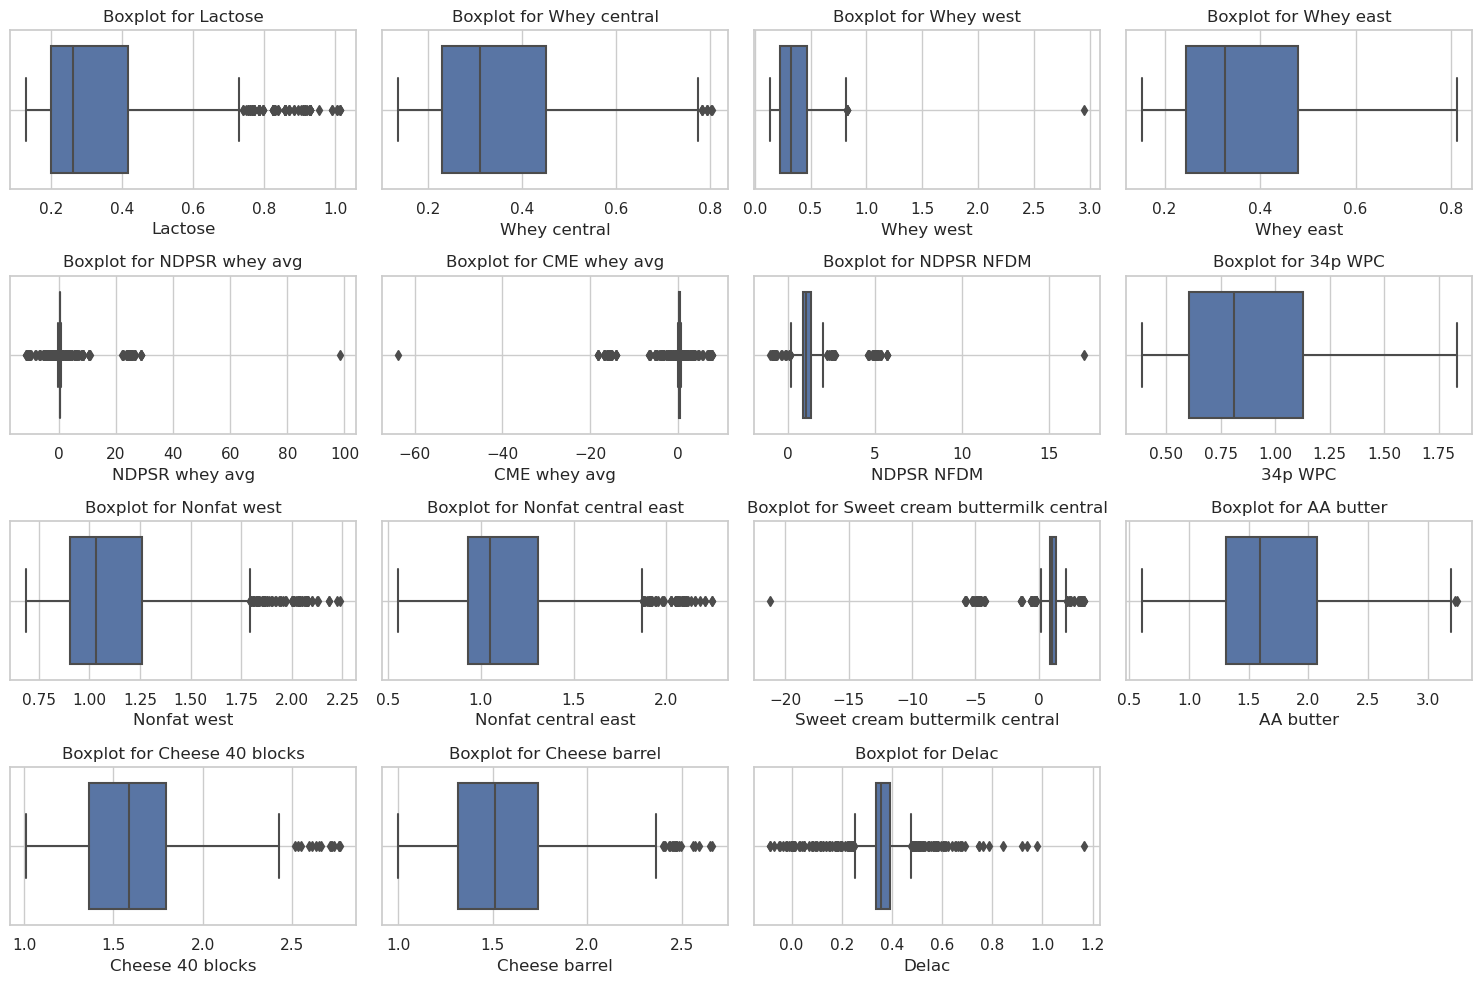

                         Attribute Outliers Count
0                          Lactose             29
1                     Whey central              0
2                        Whey west              1
3                        Whey east              0
4                   NDPSR whey avg             31
5                     CME whey avg             31
6                       NDPSR NFDM             31
7                          34p WPC              0
8                      Nonfat west              7
9              Nonfat central east              8
10  Sweet cream buttermilk central             31
11                       AA butter              2
12                Cheese 40 blocks             12
13                   Cheese barrel              5
14                           Delac             46


In [325]:
plt.figure(figsize=(15, 10))
outliers_table = detect_outliers(df_imputed, method='z', threshold=3, display_boxplots=True)

print(outliers_table)

In [326]:
df_outliers= df_imput.drop(['Whey central', '34p WPC', 'Year','Month','Week year'], axis=1)
df_outliers.describe()

,Lactose,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.336634,0.360721,0.370196,0.577332,0.239563,1.165782,1.133580,1.161713,1.066791,1.701747,1.600677,1.554218,0.361229
std,0.188927,0.174183,0.162322,5.070422,3.307826,0.873226,0.321413,0.322528,1.213930,0.505099,0.319757,0.317519,0.090843
min,0.127500,0.135000,0.152500,-11.590906,-63.903461,-1.025779,0.685000,0.552812,-21.238799,0.604352,1.008000,0.997500,-0.087157
25%,0.200000,0.227500,0.244788,0.233800,0.297583,0.875239,0.905000,0.928750,0.877500,1.306000,1.362950,1.318125,0.335000
50%,0.260000,0.322500,0.327500,0.355717,0.384536,1.030733,1.030000,1.047500,1.060000,1.596150,1.586250,1.509750,0.358060
75%,0.415000,0.465000,0.479063,0.539225,0.545730,1.352530,1.260000,1.306250,1.391639,2.073500,1.794200,1.740250,0.391182
max,1.015000,2.950000,0.811250,98.594734,7.948689,17.043702,2.240000,2.248750,3.623987,3.242200,2.772300,2.660655,1.167493


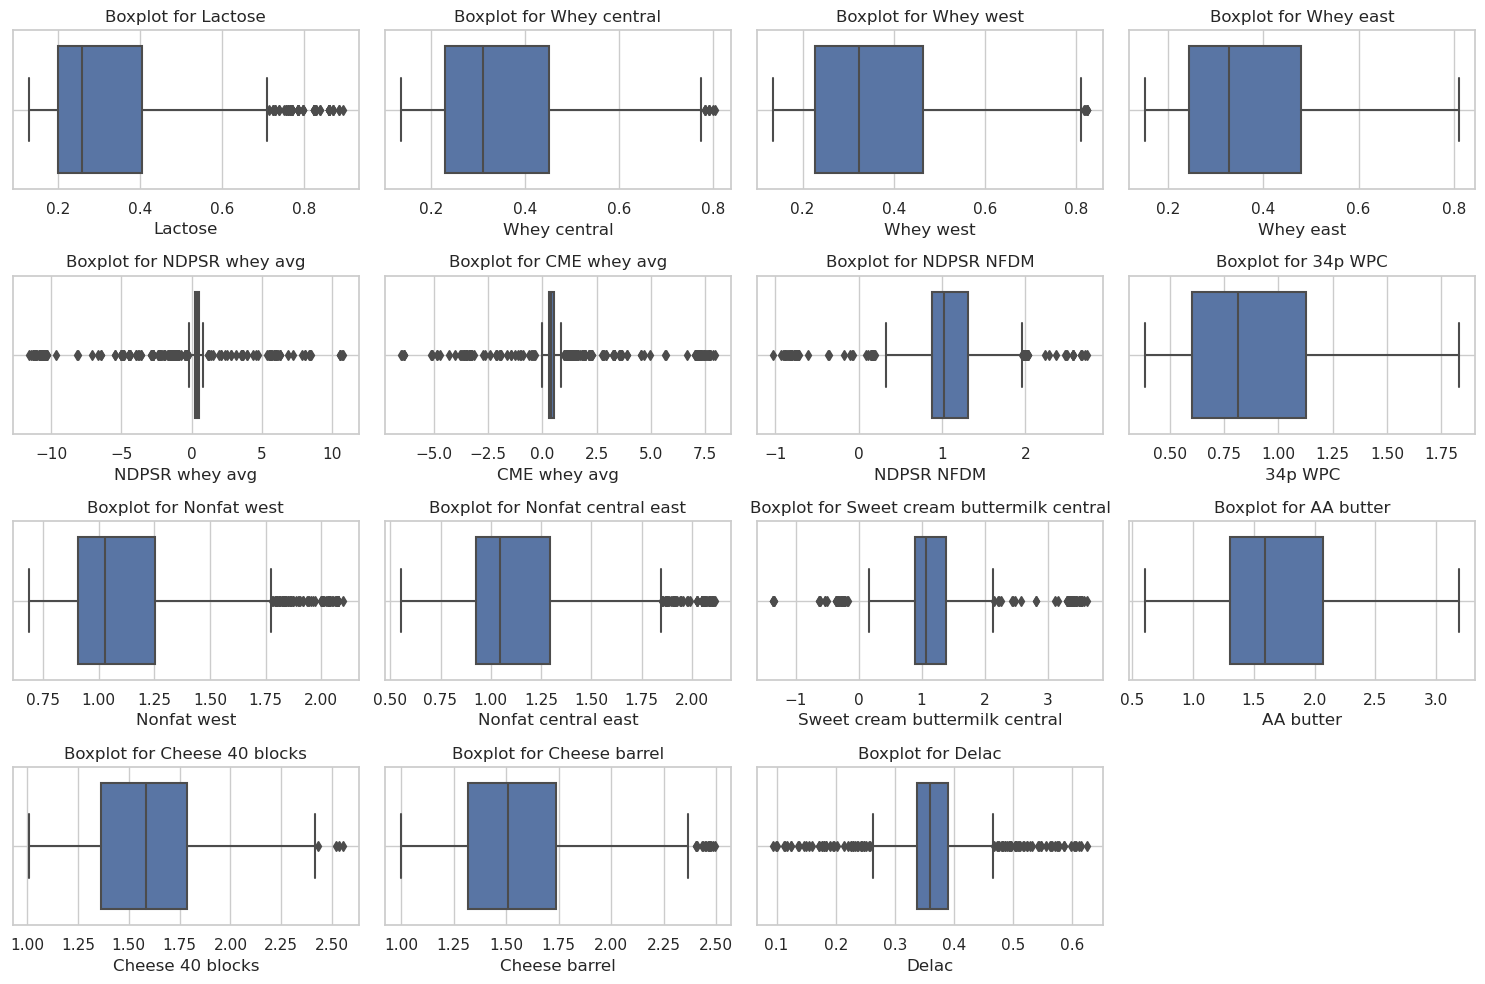

                         Attribute Outliers Count
0                          Lactose             24
1                     Whey central              0
2                        Whey west              0
3                        Whey east              0
4                   NDPSR whey avg             59
5                     CME whey avg             60
6                       NDPSR NFDM             50
7                          34p WPC              0
8                      Nonfat west             13
9              Nonfat central east              6
10  Sweet cream buttermilk central             54
11                       AA butter              0
12                Cheese 40 blocks              3
13                   Cheese barrel              1
14                           Delac             43


In [327]:
df_cleaned = remove_and_impute_all_outliers(df_imputed, method='z', threshold=3)
plt.figure(figsize=(15, 10))
outliers_table2 = detect_outliers(df_cleaned, method='z', threshold=3, display_boxplots=True)

print(outliers_table2)

In [328]:
# Save processed dataset
df_process = df_cleaned.to_csv('../Ex_F/DB/DMN Report 29 - Processed.csv', index=False)

# Feature Selection

In [329]:
# Load Dataset
df = pd.read_csv('../Ex_F/DB/DMN Report 29 - Processed.csv')

In [330]:
df_dropped = df.drop(['CME whey avg', 'NDPSR NFDM', 'Delac'], axis=1)

# Visualize correlation using Seaborn heatmap
correlation_matrix = df_dropped.corr()

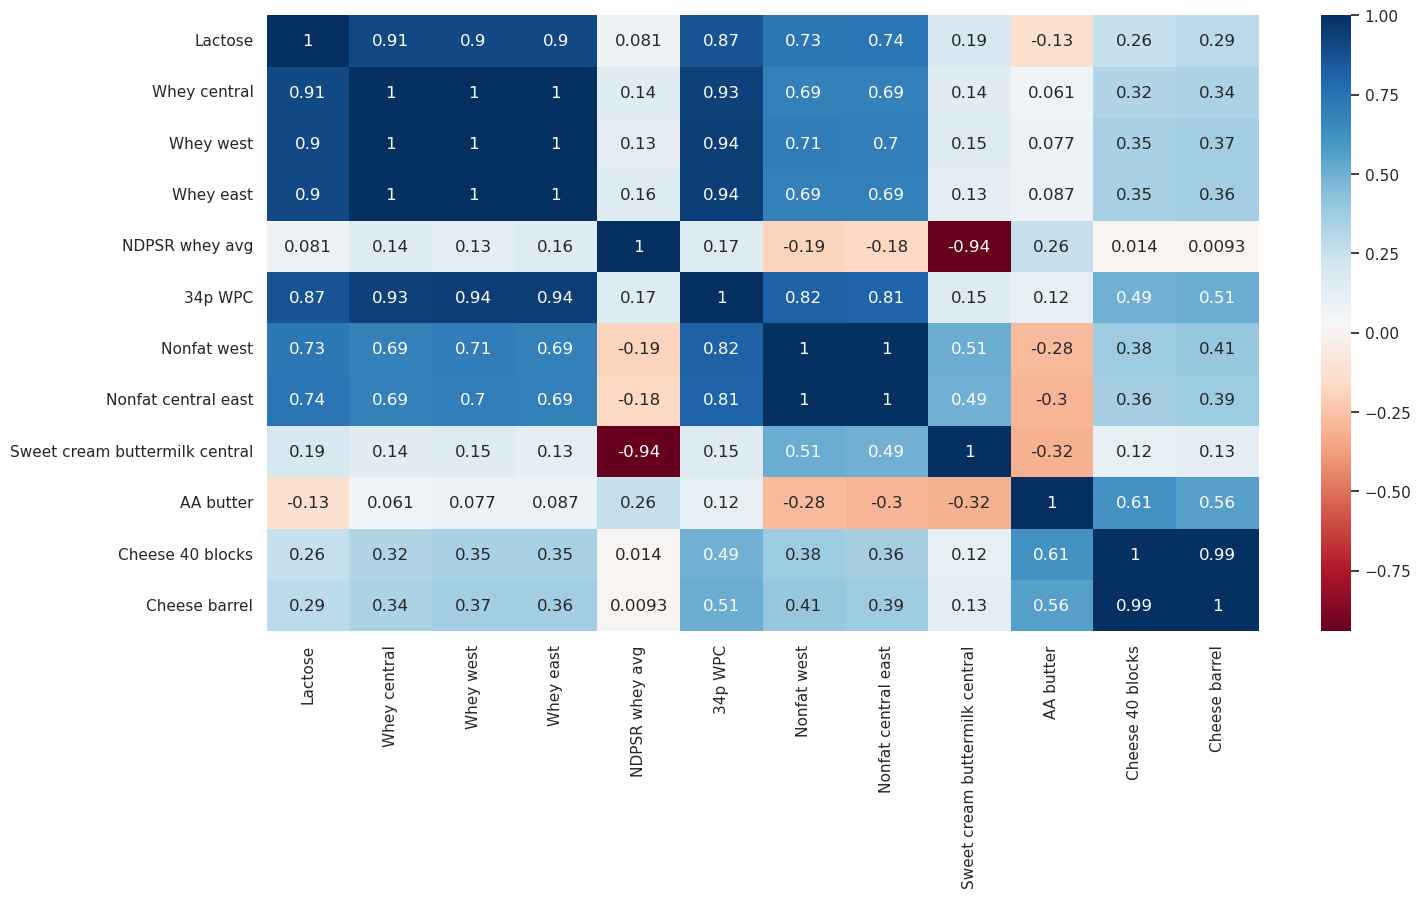

In [331]:
if df_dropped is not None:
   plt.subplots(figsize = (16,8))
   sns.heatmap(correlation_matrix.corr(), cmap='RdBu', cbar=True, annot=True)
else:
   print("df_process is None")

# Random Forest Scikit Learn Model

In [332]:
# Selecting features and target variable for the model
X = df[['Whey central', 'Whey west', 'Whey east', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central']]
y = df['Lactose']

In [333]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [334]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2*100:.4f}%')

Mean Squared Error: 0.002889685853290251
Mean Absolute Error: 0.021713280864197552
R-squared: 89.9330%


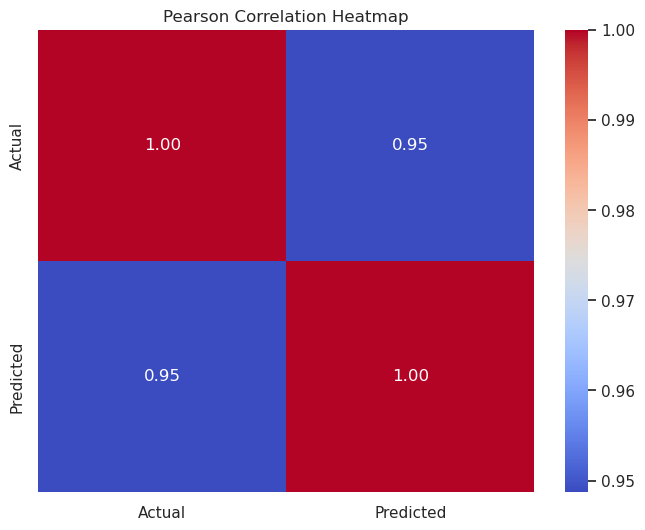

In [335]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the correlation matrix
corr_matrix = results_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

# Random Forest Custom Model

In [336]:
# Load Dataset
df = pd.read_csv('../Ex_F/DB/DMN Report 29 - Processed.csv')

In [337]:
# Selecting features and target variable for the model
X = df[['Whey central', 'Whey west', 'Whey east', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central']]
X = pd.get_dummies(X, columns=['Whey central', 'Whey west', 'Whey east', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central'])
y = df['Lactose']

In [338]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [339]:
print("X_train shape:", X_train.shape, "Type:", type(X_train))
print("X_test shape:", X_test.shape, "Type:", type(X_test))
print("y_train shape:", y_train.shape, "Type:", type(y_train))
print("y_test shape:", y_test.shape, "Type:", type(y_test))

X_train shape: (1008, 3419) Type: <class 'pandas.core.frame.DataFrame'>
X_test shape: (432, 3419) Type: <class 'pandas.core.frame.DataFrame'>
y_train shape: (1008,) Type: <class 'pandas.core.series.Series'>
y_test shape: (432,) Type: <class 'pandas.core.series.Series'>


In [340]:
# Convert pandas DataFrame into NumPy array
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series) else y_train

X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_test = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series) else y_test


print("X_train shape:", X_train.shape, "Type:", type(X_train))
print("X_test shape:", X_test.shape, "Type:", type(X_test))
print("y_train shape:", y_train.shape, "Type:", type(y_train))
print("y_test shape:", y_test.shape, "Type:", type(y_test))

X_train shape: (1008, 3419) Type: <class 'numpy.ndarray'>
X_test shape: (432, 3419) Type: <class 'numpy.ndarray'>
y_train shape: (1008,) Type: <class 'numpy.ndarray'>
y_test shape: (432,) Type: <class 'numpy.ndarray'>


In [341]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

In [342]:
class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2, max_depth=2, min_samples_leaf=1, max_leaf_nodes=None):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_leaf_nodes = max_leaf_nodes
        self.leaf_count = 0  # To keep track of the number of leaf nodes

    def fit(self, X, y):
        self.root = self._build_tree(X, y)


    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape        
        # Check if we've reached the maximum number of leaf nodes
        if self.max_leaf_nodes is not None and self.leaf_count >= self.max_leaf_nodes:
            return None
        # Check for the stopping conditions
        if n_samples < self.min_samples_split or depth > self.max_depth or n_samples < self.min_samples_leaf:
            self.leaf_count += 1  # Increment the leaf count
            return DecisionTreeNode(value=np.mean(y))        
        best_split = self._get_best_split(X, y, n_features)
        if best_split:
            left_tree = self._build_tree(best_split["dataset_left"][:, :-1], 
                                         best_split["dataset_left"][:, -1], depth + 1)
            right_tree = self._build_tree(best_split["dataset_right"][:, :-1], 
                                          best_split["dataset_right"][:, -1], depth + 1)
            return DecisionTreeNode(feature_index=best_split["feature_index"], 
                                    threshold=best_split["threshold"], 
                                    left=left_tree, right=right_tree)        
        # If it's not possible to split, return a leaf node
        self.leaf_count += 1  # Increment the leaf count
        return DecisionTreeNode(value=np.mean(y))

    def _get_best_split(self, X, y, n_features):
        best_split = {}
        min_error = float('inf')
        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self._split_dataset(X, y, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y_left, y_right = dataset_left[:, -1], dataset_right[:, -1]
                    current_error = self._calculate_split_error(y_left, y_right)
                    if current_error < min_error:
                        best_split = {
                            "feature_index": feature_index,
                            "threshold": threshold,
                            "dataset_left": dataset_left,
                            "dataset_right": dataset_right,
                            "error": current_error,
                        }
                        min_error = current_error
        return best_split if min_error != float('inf') else None

    def _split_dataset(self, X, y, feature_index, threshold):
        left_idx = np.where(X[:, feature_index] <= threshold)
        right_idx = np.where(X[:, feature_index] > threshold)
        dataset_left = np.concatenate((X[left_idx], y[left_idx].reshape(-1, 1)), axis=1)
        dataset_right = np.concatenate((X[right_idx], y[right_idx].reshape(-1, 1)), axis=1)
        return dataset_left, dataset_right

    def _calculate_split_error(self, y_left, y_right):
        left_error = calculate_mse(y_left, np.mean(y_left)) if y_left.size > 0 else 0
        right_error = calculate_mse(y_right, np.mean(y_right)) if y_right.size > 0 else 0
        return (left_error * len(y_left) + right_error * len(y_right)) / (len(y_left) + len(y_right))

    def predict(self, X):
        return np.array([self._predict_value(x, self.root) for x in X])

    def _predict_value(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]       
        if feature_val <= tree.threshold:
            return self._predict_value(x, tree.left)
        return self._predict_value(x, tree.right)

In [343]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
predictions = tree_regressor.predict(X_test)

In [344]:
# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2*100:.4f}%')

Mean Squared Error: 0.02627230261172419
Mean Absolute Error: 0.1262252757352941
R-squared: 8.4730%


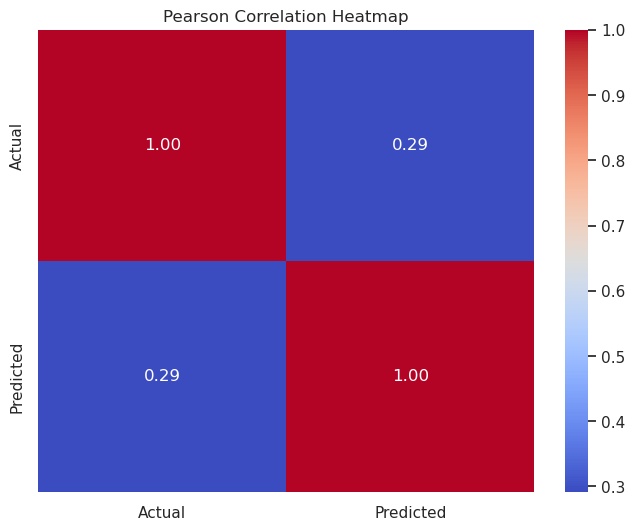

In [345]:
# Create a DataFrame with actual and predicted values
results_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Calculate the correlation matrix
corr_matrix2 = results_df2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()